## **Gold Price Visualization (With EMA200):**

**Total files used:**

from https://forexsb.com/historical-forex-data

XAUUSD_M15 --> Strategy Backtest Dataset  (From 11/06/2004 to 31/7/2025)

XAUUSD_D1 --> Quantitative Analysis (From 21/8/2008 to 26/9/2025)

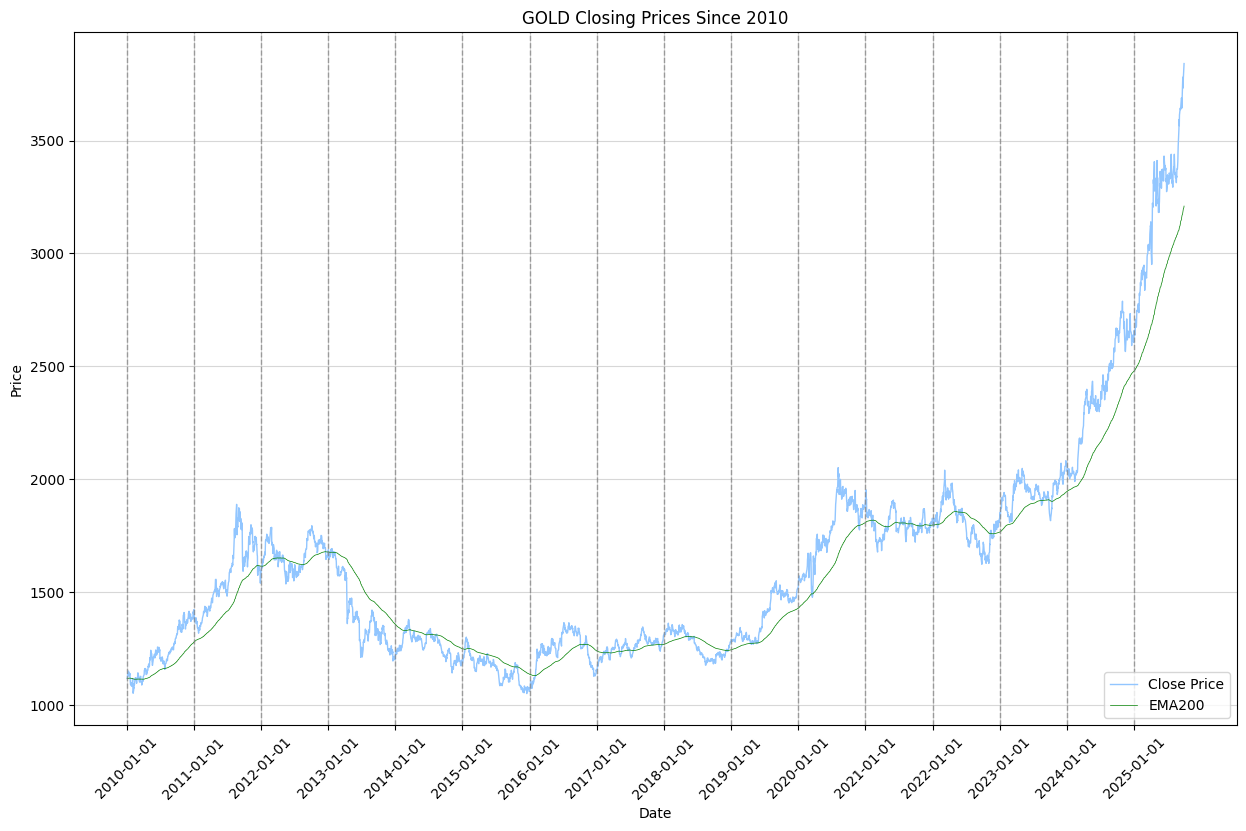



Percentage of Close Price Below EMA200:


Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
% Below EMA200,14.29%,4.76%,41.20%,96.03%,84.92%,90.48%,27.60%,28.69%,57.20%,3.17%,2.37%,57.94%,56.18%,7.60%,0.00%,0.00%


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

ticker = "GC=F"
df = yf.Ticker(ticker).history(start="2010-01-01", end="2025-10-01")

df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

plt.figure(figsize=(15, 9))
plt.style.use("seaborn-v0_8-pastel")
plt.title(f"GOLD Closing Prices Since 2010")
plt.grid(True, alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Price")
plt.plot(df["Close"], linewidth=1, label="Close Price")
plt.plot(df["EMA200"], linewidth=0.5, label="EMA200", color='green')
years = pd.date_range(start="2010-01-01", end="2025-10-01", freq="YS", tz=df.index.tz)
plt.xticks(years, rotation=45)
for year in years:
    plt.axvline(x=year, color='grey', alpha = 0.7, linestyle='--', linewidth=1.0)
plt.legend()
plt.show()

yearly_data_list = []
for year in years:
    start_year = year
    end_year = year + pd.DateOffset(years=1) - pd.Timedelta(days=1)
    yearly_df = df[(df.index >= start_year) & (df.index <= end_year)].copy()
    below_count = (yearly_df['Close'] < yearly_df['EMA200']).sum()
    total_days = len(yearly_df)
    percentage = (below_count / total_days) * 100 if total_days > 0 else 0
    yearly_data_list.append({'Year': start_year.year, '% Below EMA200': f"{percentage:.2f}%"})

below_ema_df = pd.DataFrame(yearly_data_list)
transposed_df = below_ema_df.set_index('Year').T
styled_df = transposed_df.style.set_properties(**{'font-size': '8pt', 'border': '1px solid black'})

print(f"\n\nPercentage of Close Price Below EMA200:")
display(styled_df)

## **GOLD Quantitative Analysis - 15Y (May 2010 - May 2025)**

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats

file_path = "/content/XAUUSD_D1.csv"
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
for col in ['Close', 'Open', 'High', 'Low']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

start_date = pd.to_datetime('01/05/2010', format='%d/%m/%Y')
end_date = pd.to_datetime('01/05/2025', format='%d/%m/%Y')
df = df.sort_values('Date')
df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

df['Range'] = df['High'] - df['Low']
df['Change'] = df['Close'] - df['Open']
df['abs_change'] = df['Change'].abs()
df['Return_%'] = df['Close'].pct_change() * 100  # daily return in %
df['Range_%'] = df['Range'] / df['Close'].shift(1) * 100
df['Change_%'] = df['Change'].abs() / df['Close'].shift(1) * 100


**↓ Volatility Check: Large Daily Range (≥ 90) and Large Daily Absolute Change (≥ 70)**

In [3]:
large_range_df = df[df['Range'] >= 90].sort_values('Range', ascending=False)[['Date', 'Range', 'Range_%']]
large_change_df = df[df['abs_change'] >= 70].sort_values('abs_change', ascending=False)[['Date', 'Change', 'Change_%']]

print("=== LARGE DAILY RANGE (Range ≥ 90) ===")
display(large_range_df.reset_index(drop=True))

print("\n\n=== LARGE DAILY ABSOLUTE CHANGE (|Close - Open| ≥ 70) ===")
display(large_change_df.reset_index(drop=True))


=== LARGE DAILY RANGE (Range ≥ 90) ===


,Date,Range,Range_%
0,2025-04-22,187.290,5.452475
1,2013-04-15,160.923,10.801354
2,2011-09-26,128.059,7.764695
3,2025-04-09,127.720,4.288403
4,2020-08-11,126.900,6.257063
5,2025-04-23,126.890,3.803298
6,2011-09-23,126.214,7.246432
7,2025-04-04,121.100,3.890607
8,2020-11-09,115.017,5.872784
9,2024-11-25,114.890,4.224324




=== LARGE DAILY ABSOLUTE CHANGE (|Close - Open| ≥ 70) ===


,Date,Change,Change_%
0,2013-04-15,-138.211,9.276896
1,2020-08-11,-119.103,5.872616
2,2024-11-25,-109.350,4.020627
3,2025-04-09,108.060,3.628287
4,2025-04-10,102.280,3.313791
5,2025-04-22,-98.671,2.872557
6,2025-04-16,98.230,3.020914
7,2011-08-24,-88.827,4.832947
8,2020-11-09,-87.747,4.480374
9,2025-04-21,86.659,2.588400


**↑ Results Interpretation:**

**- For Range, 9/TOP 20 comes from 2025 --> Extreme volatility in 2025 --> Outlier, will impact results**

**- For Change, 16/21 is NEGATIVE --> Gold Prices tend to sharp DROP than rise --> Should have precautions to prevent huge losses**

.

Calculate **abosolute numbers** rather than **percentage** is make sense and even practical because usually the outcomes of GOLD trading is based on pips difference instead of percentage.

**↓ Frequency Check: Probabilities of RANGE and CHANGE within Thresholds**

In [4]:
list(range(20, 145, 10))
range_thresholds = list(range(20, 145, 10))
change_thresholds = list(range(10, 135, 10))

range_prob = {
    f'> {thresh}': (df['Range'] > thresh).mean() * 100 for thresh in range_thresholds
}
change_prob = {
    f'> {thresh}': (df['abs_change'] > thresh).mean() * 100 for thresh in change_thresholds
}

range_prob_df = pd.DataFrame(range_prob.items(), columns=['Threshold', 'Probability (%)'])
change_prob_df = pd.DataFrame(change_prob.items(), columns=['Threshold', 'Probability (%)'])

print("=== Frequency of RANGE within Thresholds ===")
display(range_prob_df)

print("\n\n=== Frequency of ABSOLUTE CHANGE within Thresholds ===")
display(change_prob_df)


=== Frequency of RANGE within Thresholds ===


,Threshold,Probability (%)
0,> 20,37.363344
1,> 30,16.312969
2,> 40,7.438371
3,> 50,3.622722
4,> 60,2.036442
5,> 70,1.350482
6,> 80,0.986066
7,> 90,0.600214
8,> 100,0.385852
9,> 110,0.278671




=== Frequency of ABSOLUTE CHANGE within Thresholds ===


,Threshold,Probability (%)
0,> 10,33.204716
1,> 20,12.840300
2,> 30,5.466238
3,> 40,2.186495
4,> 50,1.136120
5,> 60,0.685959
6,> 70,0.450161
7,> 80,0.321543
8,> 90,0.150054
9,> 100,0.107181


**↓ Distribution Plot (Range)**

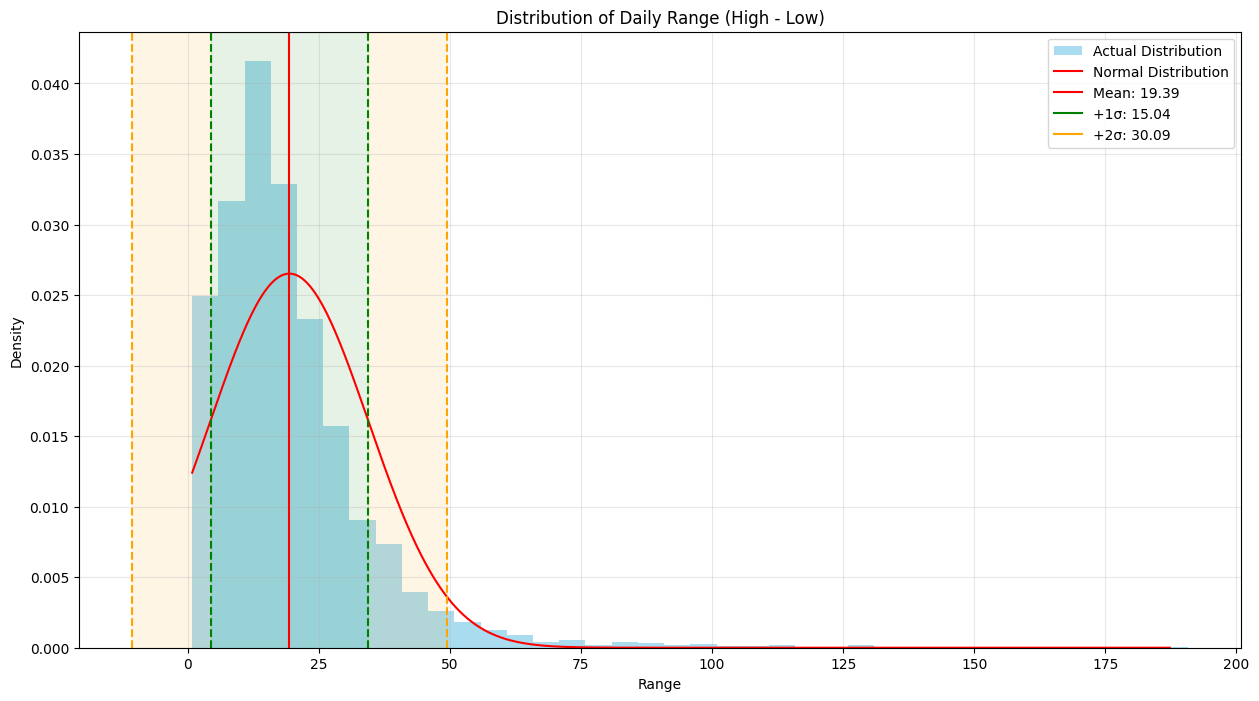

In [5]:
plt.figure(figsize=(15, 8))
range_bins = np.arange(df['Range'].min(), df['Range'].max() + 5, 5)
plt.hist(df['Range'], bins=range_bins, density=True, alpha=0.7, color='skyblue', label='Actual Distribution')

x = np.linspace(df['Range'].min(), df['Range'].max(), 1000)
mean = df['Range'].mean()
std = df['Range'].std()
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, 'r-', label='Normal Distribution')

# Shaded areas
plt.axvspan(mean - std, mean + std, color='green', alpha=0.1) #, label='±1σ')
plt.axvspan(mean - 2*std, mean - std, color='orange', alpha=0.1) #, label='±2σ')
plt.axvspan(mean + std, mean + 2*std, color='orange', alpha=0.1)

plt.axvline(mean, color='red', linestyle='-')
plt.axvline(mean + std, color='green', linestyle='--')
plt.axvline(mean - std, color='green', linestyle='--')
plt.axvline(mean + 2*std, color='orange', linestyle='--')
plt.axvline(mean - 2*std, color='orange', linestyle='--')

plt.plot([], [], color='red', label=f'Mean: {mean:.2f}')
plt.plot([], [], color='green', label=f'+1σ: {std:.2f}')
plt.plot([], [], color='orange', label=f'+2σ: {2*std:.2f}')

plt.title('Distribution of Daily Range (High - Low)')
plt.xlabel('Range')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


**↑ Each bin represent a range of $5.00 (therefore, the third bin, ranging from 10-15 is the median).**

.

**Distribution Plot (Absolute Change)**

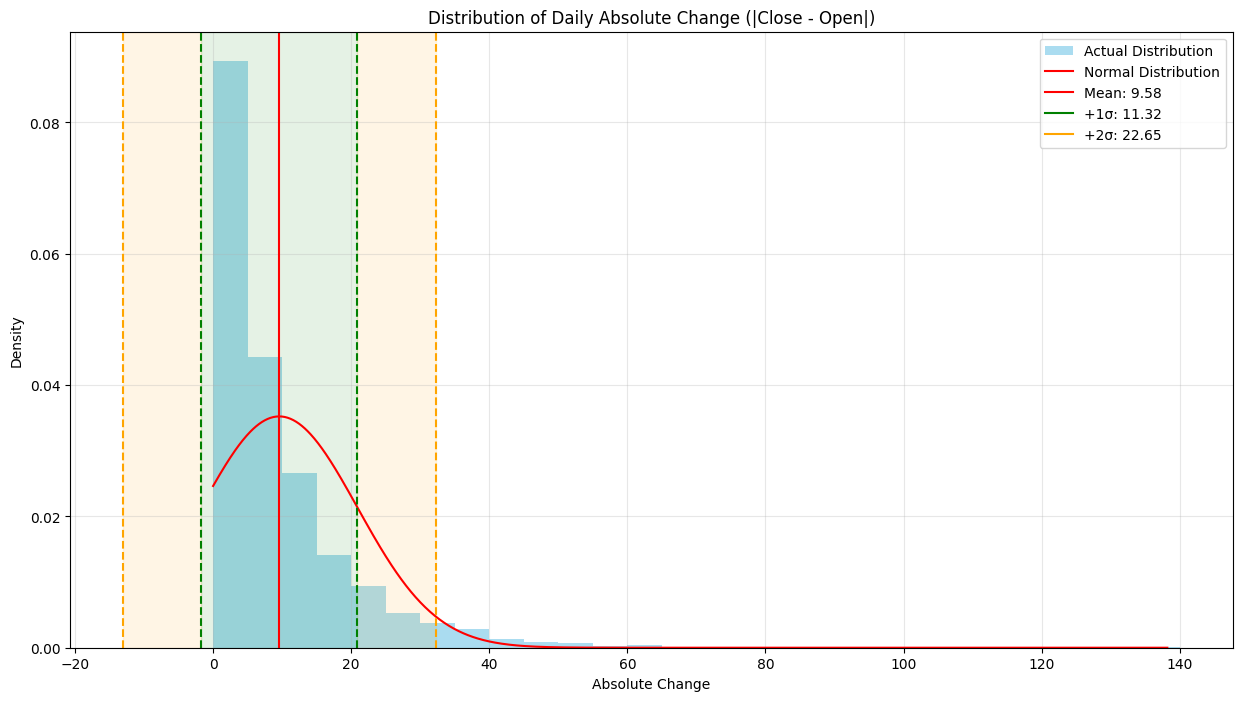

In [6]:
plt.figure(figsize=(15, 8))
change_bins = np.arange(df['abs_change'].min(), df['abs_change'].max() + 5, 5)
plt.hist(df['abs_change'], bins=change_bins, density=True, alpha=0.7, color='skyblue', label='Actual Distribution')

mean = df['abs_change'].mean()
std = df['abs_change'].std()

x = np.linspace(df['abs_change'].min(), df['abs_change'].max(), 1000)
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, 'r-', label='Normal Distribution')

plt.axvspan(mean - std, mean + std, color='green', alpha=0.1) #, label='±1σ')
plt.axvspan(mean - 2*std, mean - std, color='orange', alpha=0.1) #, label='±2σ')
plt.axvspan(mean + std, mean + 2*std, color='orange', alpha=0.1)

plt.axvline(mean, color='red', linestyle='-')
plt.axvline(mean + std, color='green', linestyle='--')
plt.axvline(mean - std, color='green', linestyle='--')
plt.axvline(mean + 2*std, color='orange', linestyle='--')
plt.axvline(mean - 2*std, color='orange', linestyle='--')

plt.plot([], [], color='red', label=f'Mean: {mean:.2f}')
plt.plot([], [], color='green', label=f'+1σ: {std:.2f}')
plt.plot([], [], color='orange', label=f'+2σ: {2*std:.2f}')

plt.title('Distribution of Daily Absolute Change (|Close - Open|)')
plt.xlabel('Absolute Change')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


**↓ Distribution Plot (Daily Return)**

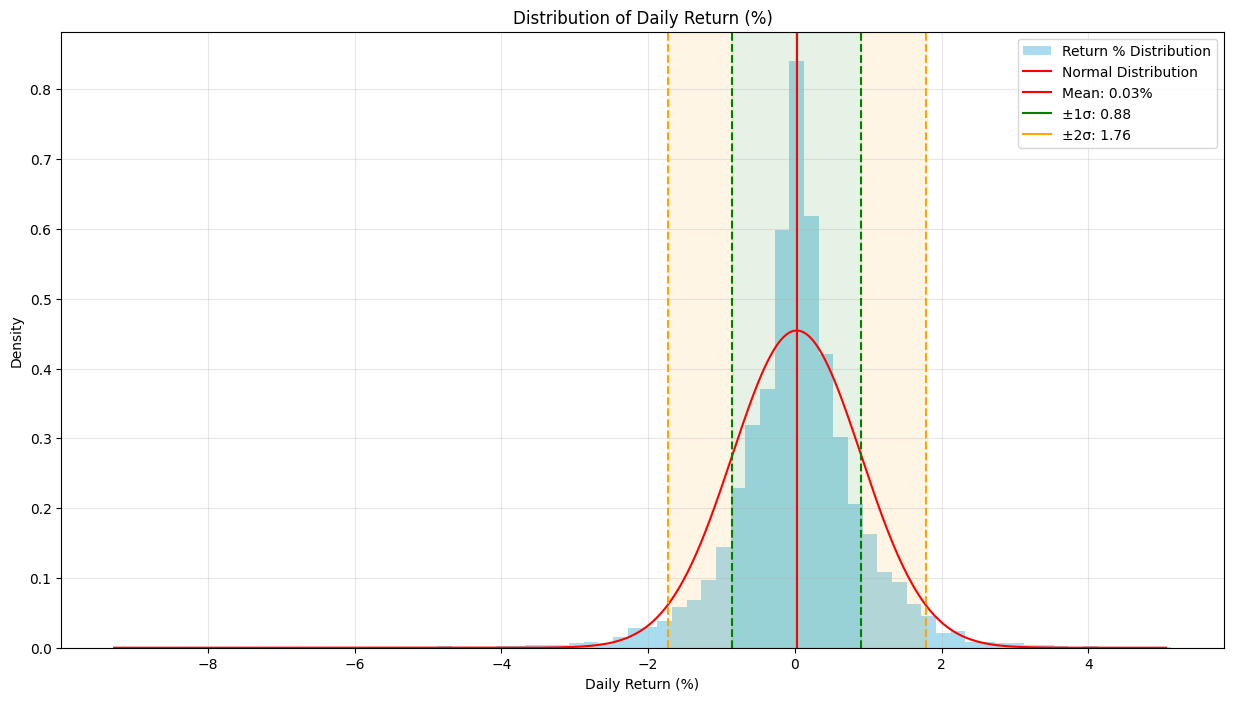

In [7]:
plt.figure(figsize=(15, 8))
return_bins = np.arange(df['Return_%'].min(), df['Return_%'].max() + 0.2, 0.2)
plt.hist(df['Return_%'].dropna(), bins=return_bins, density=True, alpha=0.7, color='skyblue', label='Return % Distribution')

mean = df['Return_%'].mean()
std = df['Return_%'].std()

x = np.linspace(df['Return_%'].min(), df['Return_%'].max(), 1000)
y = stats.norm.pdf(x, mean, std)
plt.plot(x, y, 'r-', label='Normal Distribution')

plt.axvspan(mean - std, mean + std, color='green', alpha=0.1) #, label='±1σ')
plt.axvspan(mean - 2*std, mean - std, color='orange', alpha=0.1) #, label='±2σ')
plt.axvspan(mean + std, mean + 2*std, color='orange', alpha=0.1)

plt.axvline(mean, color='red', linestyle='-')
plt.axvline(mean + std, color='green', linestyle='--')
plt.axvline(mean - std, color='green', linestyle='--')
plt.axvline(mean + 2*std, color='orange', linestyle='--')
plt.axvline(mean - 2*std, color='orange', linestyle='--')

plt.plot([], [], color='red', label=f'Mean: {mean:.2f}%')
plt.plot([], [], color='green', label=f'±1σ: {std:.2f}')
plt.plot([], [], color='orange', label=f'±2σ: {2*std:.2f}')

plt.title('Distribution of Daily Return (%)')
plt.xlabel('Daily Return (%)')
plt.ylabel('Density')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


**Result Interpretation:** Nearly a perfect normal distribution with long left tail - Make sense, as previously found that negative sharp DROP is much more than rise.

**Each bin represent a range of 0.2% (therefore, [-0.2, 0.2]% is the median).**